# shallow_net_in_tensorflow myVideoCompete IntermediateBegin

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

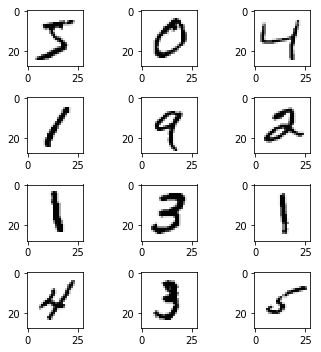

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(4, 3, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('on')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

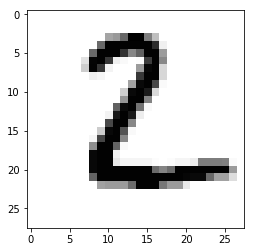

In [9]:
plt.imshow(X_valid[1], cmap='Greys')

In [10]:
X_valid[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[1]

2

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.0932 - acc: 0.1031 - val_loss: 0.0928 - val_acc: 0.1050
Epoch 2/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0924 - acc: 0.1077 - val_loss: 0.0921 - val_acc: 0.1091
Epoch 3/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0918 - acc: 0.1142 - val_loss: 0.0915 - val_acc: 0.1186
Epoch 4/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0912 - acc: 0.1310 - val_loss: 0.0909 - val_acc: 0.1372
Epoch 5/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0907 - acc: 0.1541 - val_loss: 0.0905 - val_acc: 0.1615
Epoch 6/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0903 - acc: 0.1771 - val_loss: 0.0900 - val_acc: 0.1841
Epoch 7/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0898 - acc: 0.1973 - val_loss: 0.0896 - 

Epoch 59/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0679 - acc: 0.5928 - val_loss: 0.0674 - val_acc: 0.5993
Epoch 60/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0674 - acc: 0.5987 - val_loss: 0.0668 - val_acc: 0.6074
Epoch 61/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0669 - acc: 0.6046 - val_loss: 0.0663 - val_acc: 0.6128
Epoch 62/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0664 - acc: 0.6102 - val_loss: 0.0658 - val_acc: 0.6206
Epoch 63/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0659 - acc: 0.6159 - val_loss: 0.0653 - val_acc: 0.6248
Epoch 64/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0654 - acc: 0.6219 - val_loss: 0.0648 - val_acc: 0.6310
Epoch 65/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0649 - acc: 0.6266 - val_loss: 0.0643 - val_acc: 0.6366
Epoch 66/200
60000/60000 [======

Epoch 118/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0439 - acc: 0.7662 - val_loss: 0.0431 - val_acc: 0.7737
Epoch 119/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0436 - acc: 0.7672 - val_loss: 0.0428 - val_acc: 0.7750
Epoch 120/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0433 - acc: 0.7682 - val_loss: 0.0425 - val_acc: 0.7764
Epoch 121/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.0431 - acc: 0.7691 - val_loss: 0.0422 - val_acc: 0.7771
Epoch 122/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.0428 - acc: 0.7701 - val_loss: 0.0420 - val_acc: 0.7778
Epoch 123/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.0425 - acc: 0.7708 - val_loss: 0.0417 - val_acc: 0.7791
Epoch 124/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.0423 - acc: 0.7715 - val_loss: 0.0414 - val_acc: 0.7801
Epoch 125/200
60000/

60000/60000 [==============================] - 1s 12us/step - loss: 0.0319 - acc: 0.8413 - val_loss: 0.0309 - val_acc: 0.8501
Epoch 177/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0317 - acc: 0.8421 - val_loss: 0.0308 - val_acc: 0.8511
Epoch 178/200
60000/60000 [==============================] - 1s 12us/step - loss: 0.0316 - acc: 0.8427 - val_loss: 0.0306 - val_acc: 0.8519
Epoch 179/200
60000/60000 [==============================] - 1s 12us/step - loss: 0.0314 - acc: 0.8435 - val_loss: 0.0305 - val_acc: 0.8520
Epoch 180/200
60000/60000 [==============================] - 1s 12us/step - loss: 0.0313 - acc: 0.8441 - val_loss: 0.0303 - val_acc: 0.8533
Epoch 181/200
60000/60000 [==============================] - 1s 11us/step - loss: 0.0312 - acc: 0.8448 - val_loss: 0.0302 - val_acc: 0.8538
Epoch 182/200
60000/60000 [==============================] - 1s 13us/step - loss: 0.0310 - acc: 0.8456 - val_loss: 0.0300 - val_acc: 0.8544
Epoch 183/200
60000/60000 [=======

#### Evaluating model performance

In [24]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 17us/step


[0.02772442589402199, 0.8652]

#### Performing inference

In [25]:
valid_0 = X_valid[0].reshape(1, 784)

In [26]:
model.predict(valid_0)

array([[5.0681694e-03, 1.1128912e-03, 2.1998428e-03, 5.1426403e-03,
        3.9012379e-03, 1.0817937e-02, 4.8768095e-04, 9.2893147e-01,
        4.8490213e-03, 3.7489008e-02]], dtype=float32)

In [27]:
model.predict_classes(valid_0)

array([7], dtype=int64)